# 1. Objectives
1. Summarize how Seaborn and Pandas provide *wrappers* to create visualizations using Matplotlib
2. Understand when to use each type of graph (line charts, bar charts and heatmaps)
3. Use Seaborn to plot line charts, bar charts and heatmaps

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Pandas
Let's refresh what we did from last lesson. Pandas provides functionality to work with table data. Most data is organized in rows and columns (think of an Excel Spreadsheet) and pandas uses the `DataFrame` object to represent that data. However, pandas is based on numpy and uses its computational efficiency for much of its functionality. The `Series` object is simply a `numpy.ndarray` that also has labels. A `DataFrame` is a collection of `Series` objects.

### Reading a CSV File
**Q1.1.** Use the `read_csv` function to read the 'PGA Stats.csv' file and we will do the following to help us plot the data: 
* set the index column to `PLAYER`
* replace the null ('--') values from `AGE` and `EARNINGS`
* remove the commas from `CUP POINTS`
* remove the dollar signs from `EARNINGS`

I can never remember all of the methods, attributes, parameters, etc. so use the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv) to help! Assign the resulting `DataFrame` to a variable named `pga`. Next, use the `head` method to inspect the first five lines of the file:

In [3]:
# read 'PGA Stats.csv', set the index column, replace null values, remove the commas, replace $ with ''
pga = pd.read_csv('PGA Stats.csv', index_col = 1, thousands = ',', na_values = '--')
pga['EARNINGS'] = pga.EARNINGS.replace('[\$,]', '', regex = True).astype(float)

# inspect the first five rows


,RK,AGE,EVENTS,ROUNDS,CUTS MADE,TOP 10,WINS,CUP POINTS,EARNINGS
PLAYER,,,,,,,,,
Justin Thomas,1,25.0,23,82,21,10,3,1610,8694821.0
Dustin Johnson,2,34.0,20,74,19,12,3,2056,8457352.0
Justin Rose,3,38.0,18,66,17,11,2,2260,8130678.0
Bryson DeChambeau,4,25.0,26,93,22,9,3,2188,8094489.0
Brooks Koepka,5,28.0,17,62,15,6,2,1093,7094047.0


**Q1.2.** Next, we will use the `info` method to verify how pandas is storing the data type of each column.

In [4]:
# inspect column data types


<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, Justin Thomas to Len Mattiace
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RK          559 non-null    int64  
 1   AGE         403 non-null    float64
 2   EVENTS      559 non-null    int64  
 3   ROUNDS      559 non-null    int64  
 4   CUTS MADE   559 non-null    int64  
 5   TOP 10      559 non-null    int64  
 6   WINS        559 non-null    int64  
 7   CUP POINTS  559 non-null    int64  
 8   EARNINGS    253 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 43.7+ KB


# 3. Data Visualization
In the Kaggle lessons, you are using the [seaborn](https://seaborn.pydata.org/introduction.html) package to create a variety of visualizations. However, seaborn is built on matplotlib and creates a matplotlib object. This is the reason we also import matplotlib.

The functionality that seaborn provides is what is known as a *wrapper*. A *wrapper* uses functionality from one interface (in this case matplotlib) and provides a new interface that is either easier to use, more convenient, or provides more options to customize. Both seaborn and panda provide wrappers to create plots using matplotlib. However, more advanced customization may require using matplotlib directly. There are several examples of this in the Kaggle lessons.

As a result, you may find it useful to have the documentation for each of these packages:
* [seaborn documentation](https://seaborn.pydata.org/api.html#)
* [pandas plotting documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)
* [matplotlib documentation](https://matplotlib.org/contents.html#)

### Bar Chart
**Q2.1.** In the following cell, use the seaborn module to create a bar plot of earnings for each player. Since each player's name is the index (row labels), you can use `pga.index` to use those row labels as the argument for the `x` parameter.

<AxesSubplot:xlabel='PLAYER', ylabel='EARNINGS'>

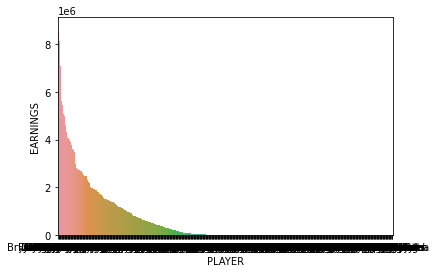

In [36]:
# plot a bar chart (x = player name, y = earnings)


**Q2.2.** This is less than helpful since there are so many players. Instead, let's only look at the top 10 players. **Remember: We can utilize `.iloc[]` to help us slice a pandas Series (just like list slicing!).**

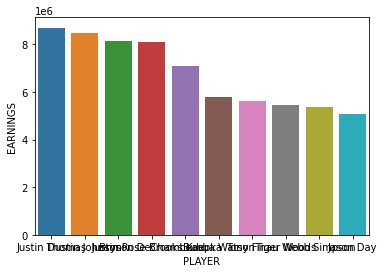

In [37]:
# plot a bar chart for top 10 players


**Q2.3.** Create a horizontal bar chart to make the player name be more visible. To do so, switch the `x` and `y` arguments.

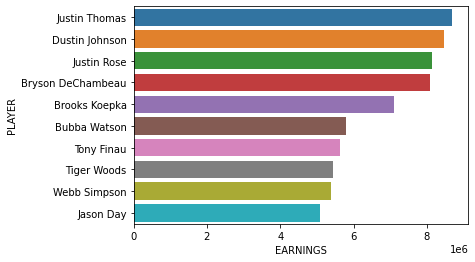

In [38]:
# flip x and y to make horizontal bar chart


**Q2.4.** Add a title to the chart: Top 10 Players by Earnings in 2018-2019

We will also add `plt.show()` as the last statement so that we do not output the type of object each time (`<matplotlib.axes._subplots.AxesSubplot at ...>`).

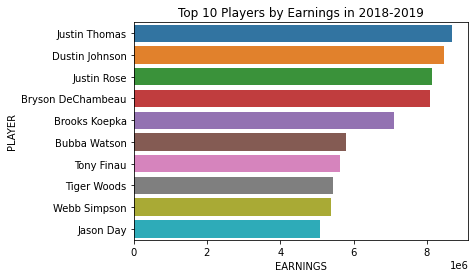

In [39]:
# add title to bar chart

plt.show()

One obvious question you may be asking yourself is how does matplotlib know to add the title to this figure? We are not assigning the result of the `barplot` function call to anything so how does this work?

Matplotlib provides two different interfaces to its functionality:
* explicitly create figures and axes and then call methods on them (what we are used to)
* rely on `pyplot` to automatically create and manage the figures and axes (what you have seen so far)

The matplotlib usage guide provides two useful descriptions you should skim:
* the object-oriented interface vs the `pyplot` interface comparison and examples ([link](https://matplotlib.org/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface))
* the anatomy of a visualization figure ([link](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure))

Pandas also provides a wrapper for creating matplotlib visualizations. The pandas wrapper is compelling because it is a method that acts on the `DataFrame` that you intend to plot. As a result, you do not need to explicitly reference the name of the `DataFrame` for each `Series` that you are going to plot. The below example creates the same plot:

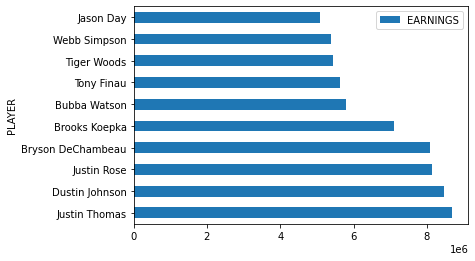

In [40]:
pga.iloc[:10].plot(kind='barh', y='EARNINGS')
plt.show()

# 3. Baby Name Visualization

**Q3.1.** Use the `read_csv` function to read the 'babynames.csv' file and set the index to the column `Id`.

In [1]:
# read file


# set index to Id


# inspect


**Q3.2.** Remember we can use a Boolean expression inside of the `.loc` operator and it will return only the rows where the Boolean expression is `True`. In the below code cell, output only those rows where the Name value is 'Kevin'.

**Q3.3.** Now, let's visualize the trend of this name over time using either Seaborn, Pandas, or Maptplotlib directly. Remember, use `plt.show()` to only output the figure.

In [3]:
# plot the trend of Kevin

# plt.show()

Why is there a band around the data? Seaborn, by default, will include error bounds when there are multiple values for each x-value. In this case, there was a period of time that girls were named 'Kevin' as well as boys so there were two values for those years. You may have picked up on this by the number of rows in the earlier DataFrame, but visualizing the data helps illuminate subtle details that you may not have noticed otherwise.

**Q3.4.** Again, plot the trend of the popularity of the name 'Kevin' over time, but limit the results where Gender is male. Do not forget to include parenthesis.

In [ ]:
# plot the trend of Kevin where Gender is M

# plt.show()